# IMDb การทำ Web scrapping และการจัดรูปแบบให้อยู่ในรูป CSV File เพื่อนำข้อมูลไปใช้งาน

In [ ]:
import lxml
import re
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup
from requests import get


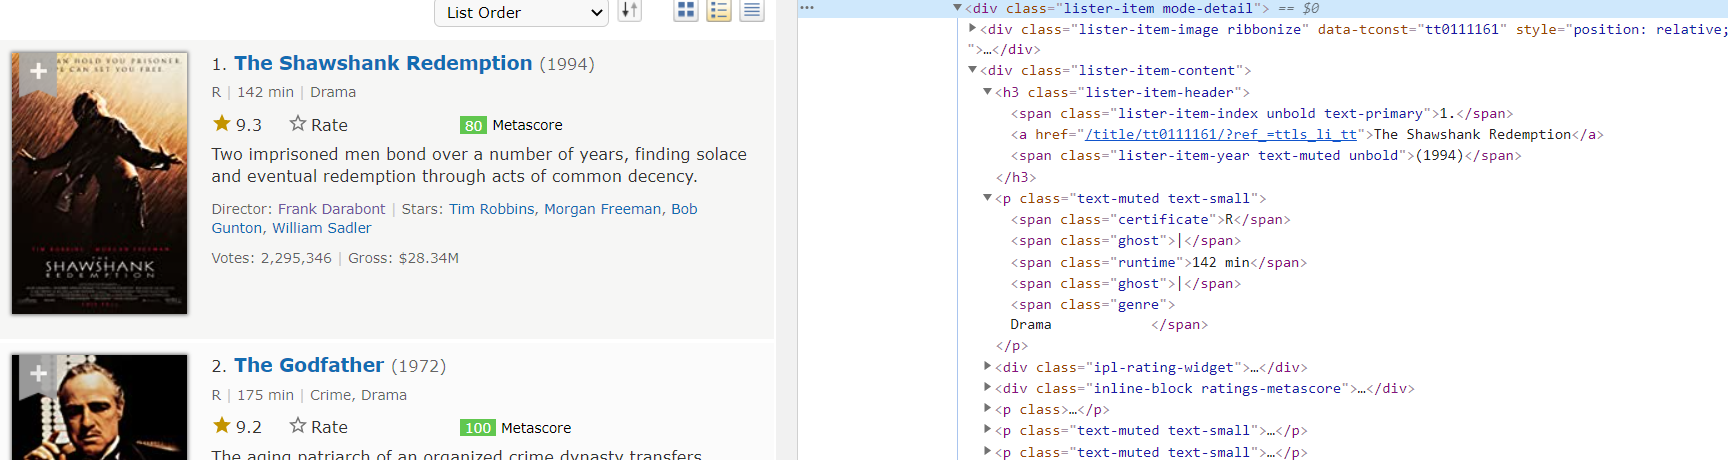

In [ ]:
url1 = "https://www.imdb.com/list/ls091520106/"

class IMDB(object):

	def __init__(self, url):
		super(IMDB, self).__init__()
		page = get(url)

		self.soup = BeautifulSoup(page.content, 'lxml')
	

	def articleTitle(self):
		return self.soup.find("h1", class_="header").text.replace("\n","")

	
	def bodyContent(self):
		content = self.soup.find(id="main")
		return content.find_all("div", class_="lister-item mode-detail")

	def movieData(self):
		movieFrame = self.bodyContent()
		movieTitle = []
		movieDate = []
		movieRunTime = []
		movieGenre = []
		movieRating = []
		movieR = []
		movieVotes = []
		movieGross = []
		for movie in movieFrame:
			movieFirstLine = movie.find("h3", class_="lister-item-header")
			movieTitle.append(movieFirstLine.find("a").text)
			movieDate.append(re.sub(r"[()]","", movieFirstLine.find_all("span")[-1].text))

			movieRate = movie.find("p", class_="text-muted text-small")
	 
			try:
				movieRunTime.append(movie.find("span", class_="runtime").text[:-4])
			except:
				movieRunTime.append(np.nan)
			movieGenre.append(movie.find("span", class_="genre").text.rstrip().replace("\n","").split(","))
   
			try:
				movieRating.append(movie.find("span",class_="ipl-rating-star__rating").text)
			except:
				movieRating.append(np.nan)
			

			try:
				rate = movieRate.text.replace("\n","").split('|')
				rate = [x.strip() for x in rate]
				movieR.append(rate[0])
			except:
				rate = movieRate.text.replace("\n","").strip()
				movieR.append(np.nan)
				

			movieNumbers = movie.find_all("span", attrs={"name": "nv"})

			if len(movieNumbers) == 2:
				movieVotes.append(movieNumbers[0].text)
				movieGross.append(movieNumbers[1].text)
			elif len(movieNumbers) == 1:
				movieVotes.append(movieNumbers[0].text)
				movieGross.append(np.nan)
			else:
				movieVotes.append(np.nan)
				movieGross.append(np.nan)

		movieData = [movieTitle, movieDate, movieRunTime, movieGenre, movieRating, 
							movieR, movieVotes, movieGross]
		return movieData

if __name__ == '__main__':
	site1 = IMDB(url1)
	print("Subject: ", site1.articleTitle())
	data = site1.movieData()
	for i in range(len(data)):
		print(data[i][:])

Subject:  Top 100 Movies Bucket List
['The Shawshank Redemption', 'The Godfather', 'The Godfather: Part II', 'The Dark Knight', '12 Angry Men', "Schindler's List", 'The Lord of the Rings: The Return of the King', 'Pulp Fiction', 'The Good, the Bad and the Ugly', 'Fight Club', 'Joker', 'The Lord of the Rings: The Fellowship of the Ring', 'Forrest Gump', 'Inception', 'Star Wars: Episode V - The Empire Strikes Back', 'The Lord of the Rings: The Two Towers', 'The Matrix', "One Flew Over the Cuckoo's Nest", 'Goodfellas', 'Seven Samurai', 'Se7en', 'City of God', 'Life Is Beautiful', 'The Silence of the Lambs', 'Star Wars: Episode IV - A New Hope', "It's a Wonderful Life", 'Saving Private Ryan', 'Spirited Away', 'The Green Mile', 'Léon: The Professional', 'Harakiri', 'Interstellar', 'The Usual Suspects', 'The Lion King', 'American History X', 'Back to the Future', 'The Pianist', 'Modern Times', 'Terminator 2: Judgment Day', 'The Intouchables', 'Psycho', 'Gladiator', 'City Lights', 'The Depart

#Data Frame

In [ ]:
site1 = IMDB(url1)
print("Subject: ", site1.articleTitle())
data = site1.movieData()
df = pd.DataFrame({'Title': data[0][:],
'Years': data[1][:],
'RunTime': data[2][:],
'Genre': data[3][:],
'Rating': data[4][:],
'R': data[5][:],
'Votes': data[6][:],
'Gross': data[7][:]
  })
print(df.info())
df.index += 1
df

Subject:  Top 100 Movies Bucket List
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Title    100 non-null    object
 1   Years    100 non-null    object
 2   RunTime  100 non-null    object
 3   Genre    100 non-null    object
 4   Rating   100 non-null    object
 5   R        100 non-null    object
 6   Votes    100 non-null    object
 7   Gross    95 non-null     object
dtypes: object(8)
memory usage: 6.4+ KB
None


,Title,Years,RunTime,Genre,Rating,R,Votes,Gross
1,The Shawshank Redemption,1994,142,[Drama],9.3,R,"2,293,043",$28.34M
2,The Godfather,1972,175,"[Crime, Drama]",9.2,R,"1,582,807",$134.97M
3,The Godfather: Part II,1974,202,"[Crime, Drama]",9,R,"1,105,811",$57.30M
4,The Dark Knight,2008,152,"[Action, Crime, Drama]",9,PG-13,"2,258,091",$534.86M
5,12 Angry Men,1957,96,"[Crime, Drama]",8.9,Approved,"673,640",$4.36M
...,...,...,...,...,...,...,...,...
96,North by Northwest,1959,136,"[Adventure, Mystery, Thriller]",8.3,Approved,"293,760",$13.28M
97,A Clockwork Orange,1971,136,"[Crime, Drama, Sci-Fi]",8.3,R,"744,452",$6.21M
98,Snatch,2000,102,"[Comedy, Crime]",8.3,R,"770,156",$30.33M
99,Amélie,2001,122,"[Comedy, Romance]",8.3,R,"693,492",$33.23M


# Export to csv

In [ ]:
# final_df = df.sort_values(by=['Date'], ascending=False).reset_index()
# final_df.index += 1
# final_df

In [ ]:
from google.colab import files
df.to_csv('IMDb.csv') 
files.download('IMDb.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>